In [112]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import bottleneck
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram

%matplotlib inline

In [4]:
articles = pd.read_pickle('data/articles.pkl')

In [123]:
articles.columns

Index(['document_type', 'web_url', 'lead_paragraph', 'abstract', 'snippet',
       'news_desk', 'word_count', 'source', 'section_name', 'subsection_name',
       '_id', 'pub_date', 'print_page', 'headline', 'content'],
      dtype='object')

In [51]:
texts = articles.content.as_matrix()

texts2 = articles[articles.section_name.isin(['Sports', 'Arts', 'Business'])].content.as_matrix()

texts

array([ 'the original goal building model football forecasting weigh importance facet game in particular wanted know offense important defense defense really win championship “what’s important tricky question you would think symmetric zero-sum sport like football offense defense equally important winning for every yard point gained offensive squad defensive squad surrendered equal yard point and that’s true game level when aggregate squad performance team find total number yard point gained surrendered indeed symmetric distribution offense wider in word really good really bad offense average defense we use advanced metric team performance like expected point added epa win probability added wpa measure spread performance the standard deviation distribution tell u wide statistic distributed is bell curve wide narrow since 2000 season standard deviation epa 81 point team offense 65 point team defense for wpa it’s 2.6 win team offense 2.0 win team defense both measure 30 percent bigger off

In [19]:
tfidf = TfidfVectorizer()

word_matrix = tfidf.fit_transform(texts)

In [30]:
inverse_vocab = {v:k for k, v in tfidf.vocabulary_.items()}

In [34]:
words = np.vectorize(inverse_vocab.get)(top10)
words

array([['republican', 'government', 'shutdown', 'house', 'health', 'mr',
        'law', 'senate', 'obama', 'care'],
       ['game', 'team', 'season', 'yankee', 'said', 'league', 'rivera',
        'the', 'player', 'yard'],
       ['mr', 'the', 'said', 'government', 'state', 'year', 'percent',
        'official', 'people', 'united'],
       ['it', 'mr', 'the', 'said', 'new', 'one', 'like', 'ms', 'year',
        'art'],
       ['iranian', 'iran', 'rouhani', 'nuclear', 'israel', 'obama',
        'united', 'mr', 'netanyahu', 'president']], 
      dtype='<U10')

In [128]:
def get_words(k = 3, matrix = word_matrix, vocab_dict = inverse_vocab):
    km = KMeans(n_clusters = k)
    km.fit(matrix)
    clusters = km.cluster_centers_
    top10 = []
    for row in clusters:
        top10.append(np.argpartition(-row, 10)[:10])    
    top10 = np.array(top10)
    return np.vectorize(vocab_dict.get)(top10), km

In [129]:
topics, km = get_words(10, matrix = word_matrix, vocab_dict=inverse_vocab)

In [132]:
for i, headline in enumerate(articles.headline[:10]):
    print(headline, topics[km.labels_[i]])

Week 5 Probabilities: Why Offense Is More Important Than Defense ['player' 'game' 'said' 'he' 'team' 'coach' 'season' 'yard' 'touchdown'
 'the']
New Immigration Bill Put Forward ['law' 'government' 'obama' 'health' 'house' 'care' 'republican' 'senate'
 'shutdown' 'mr']
Arizona: Judge Orders Monitor to Oversee Maricopa County Sheriff ['the' 'said' 'mr' 'year' 'state' 'company' 'new' 'would' 'one' 'people']
Texas: State Bought Execution Drugs From a Compounding Pharmacy ['the' 'said' 'mr' 'year' 'state' 'company' 'new' 'would' 'one' 'people']
Nadal on Track for No. 1 Spot ['the' 'said' 'mr' 'year' 'state' 'company' 'new' 'would' 'one' 'people']
Judge Halts Work on World Cup Stadium ['victory' 'scored' 'match' 'formula' 'team' 'oracle' 'cup' 'race'
 'zealand' 'club']
Bayern Munich Dominates Manchester City ['victory' 'scored' 'match' 'formula' 'team' 'oracle' 'cup' 'race'
 'zealand' 'club']
American Leads in World Gymnastics All-Around ['the' 'said' 'mr' 'year' 'state' 'company' 'new' 'wo

In [57]:
tfidf2 = TfidfVectorizer()

word_matrix2 = tfidf2.fit_transform(texts2)

inverse_vocab2 = {v:k for k, v in tfidf2.vocabulary_.items()}

In [60]:
get_words(k = 3, matrix = word_matrix2, vocab_dict=inverse_vocab2)

array([['said', 'rivera', 'yankee', 'game', 'pettitte', 'girardi',
        'season', 'cano', 'jeter', 'inning'],
       ['ms', 'new', 'the', 'art', 'music', 'mr', 'show', 'work', 'it',
        'like'],
       ['season', 'the', 'said', 'game', 'team', 'he', 'yard', 'year',
        'player', 'cup']], 
      dtype='<U8')

In [77]:
sample = articles.sample(200)

In [135]:
s_texts = sample.content.as_matrix()
s_title = sample.headline.as_matrix()


In [84]:
s_vector = TfidfVectorizer()
s_matrix = s_vector.fit_transform(s_texts)

In [109]:
print(s_matrix.shape)
sq = squareform(pdist(s_matrix.toarray()))

(200, 12892)


/Users/rohitunni/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


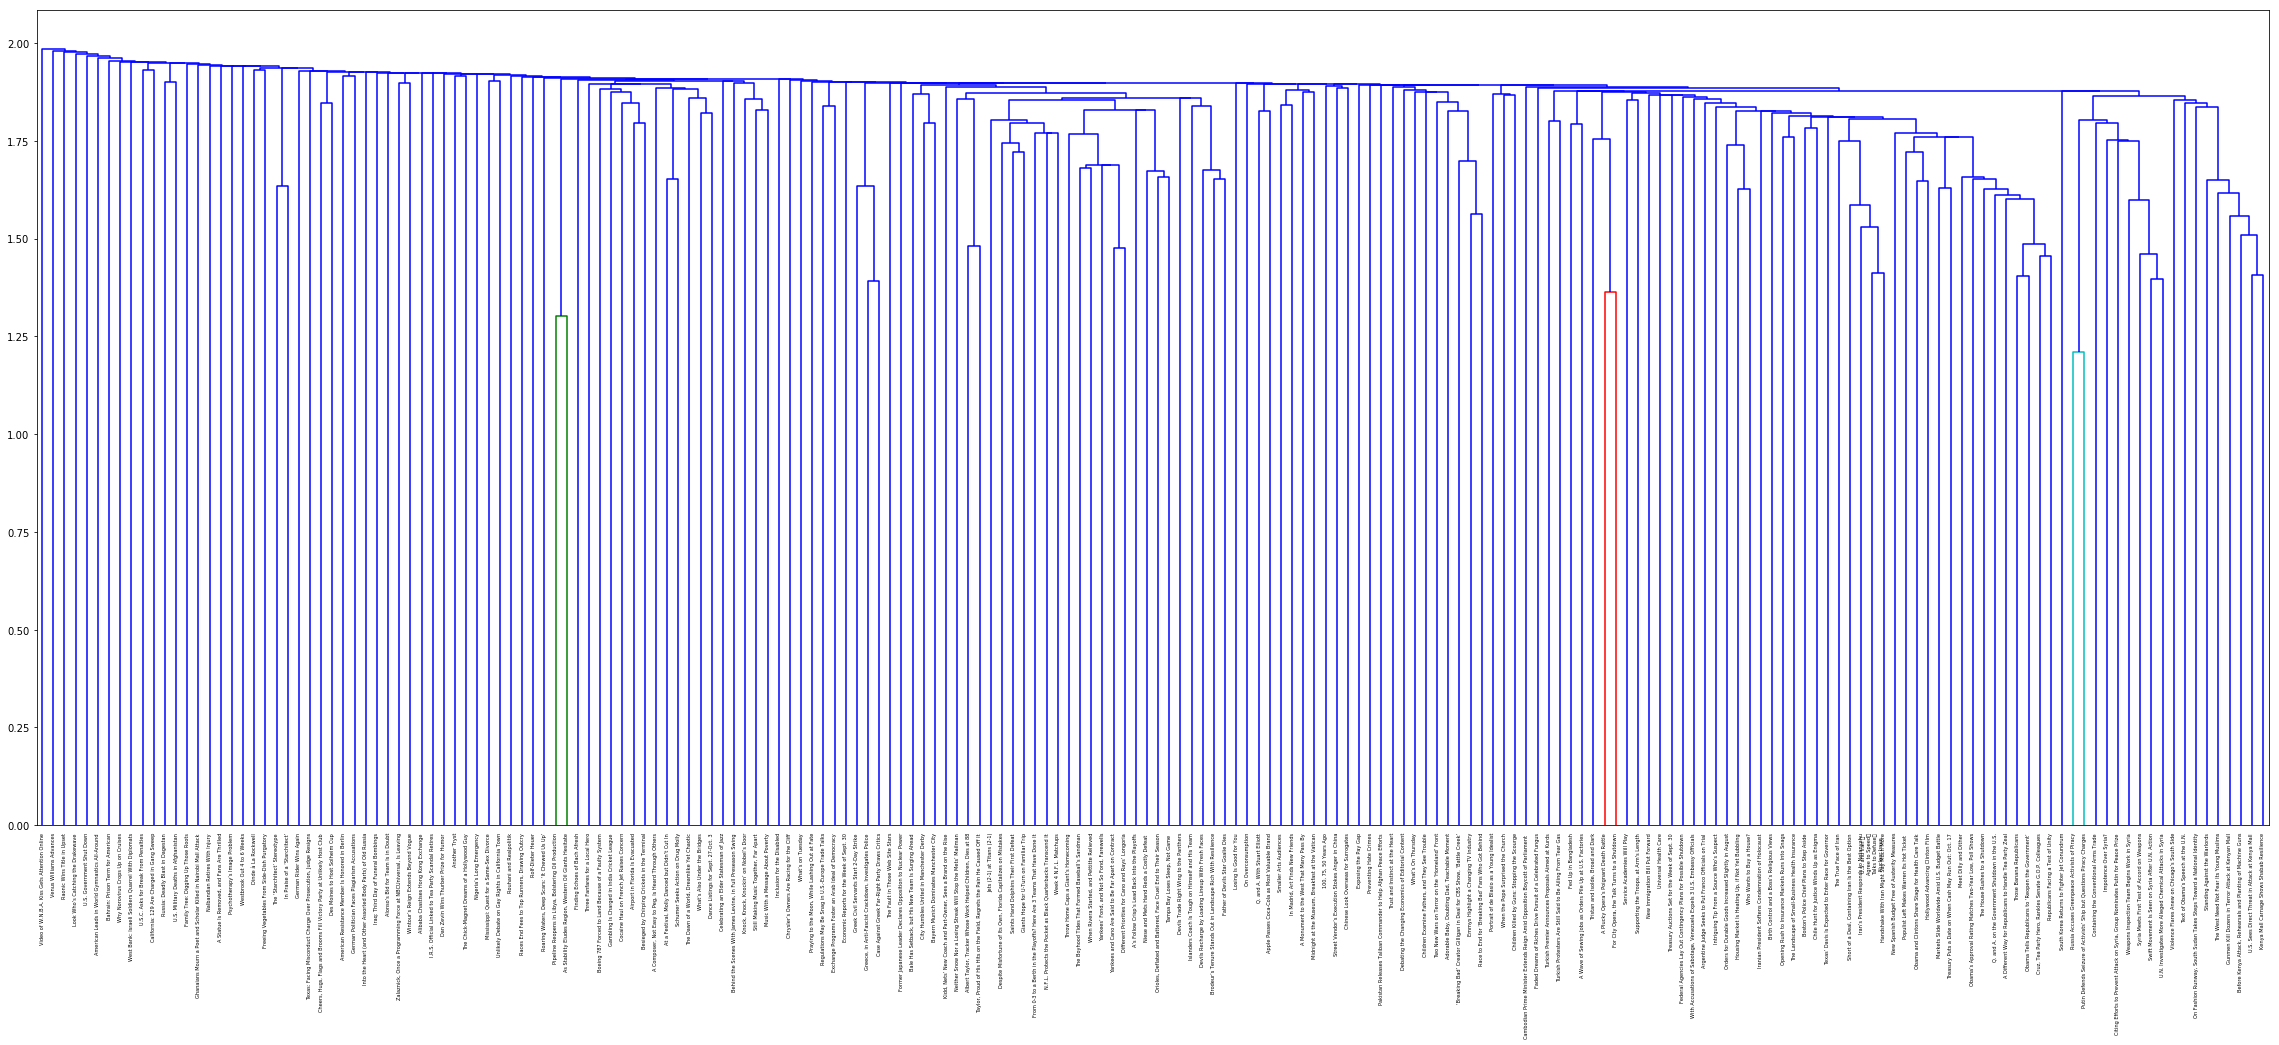

In [137]:
fig = plt.figure(figsize = (40, 15))

R = dendrogram(linkage(sq), labels = s_title)

fig.savefig('test_dendro.png', dpi = 1000)

In [134]:
s_texts

array([ 'st. petersburg fla. every noise amplified amid anguish baltimore oriole clubhouse trunk filled gear closed startling slam hair dryer could heard full throttle bathroom monday travel date swept tampa bay ray oriole packed mostly stunned silence disbelief “this game real cold oriole manager buck showalter said this loss hurt baltimore far beyond 5-4 score third baseman manny machado sustained potentially serious injury left knee leg appeared buckle stepped first running single he carried field stretcher second baseman alexi casilla crashed right fielder nick markakis diving catch bloop hit scary collision left casilla possible concussion if enough oriole mathematically eliminated american league wild-card chase james loney homered lead bottom ninth seal rays’ win loney rays’ regular starting first baseman summoned pinch-hitter blasted 0-1 pitch tommy hunter right-field seat the ray raced home greet loney celebrate four-game sweep put game ahead cleveland indian a.l.’s top wild-c

In [145]:
limit_vector = TfidfVectorizer(max_features=500)
lim_matrix = limit_vector.fit_transform(s_texts)
sq2 = squareform(pdist(lim_matrix.toarray(), metric='cosine'))

/Users/rohitunni/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


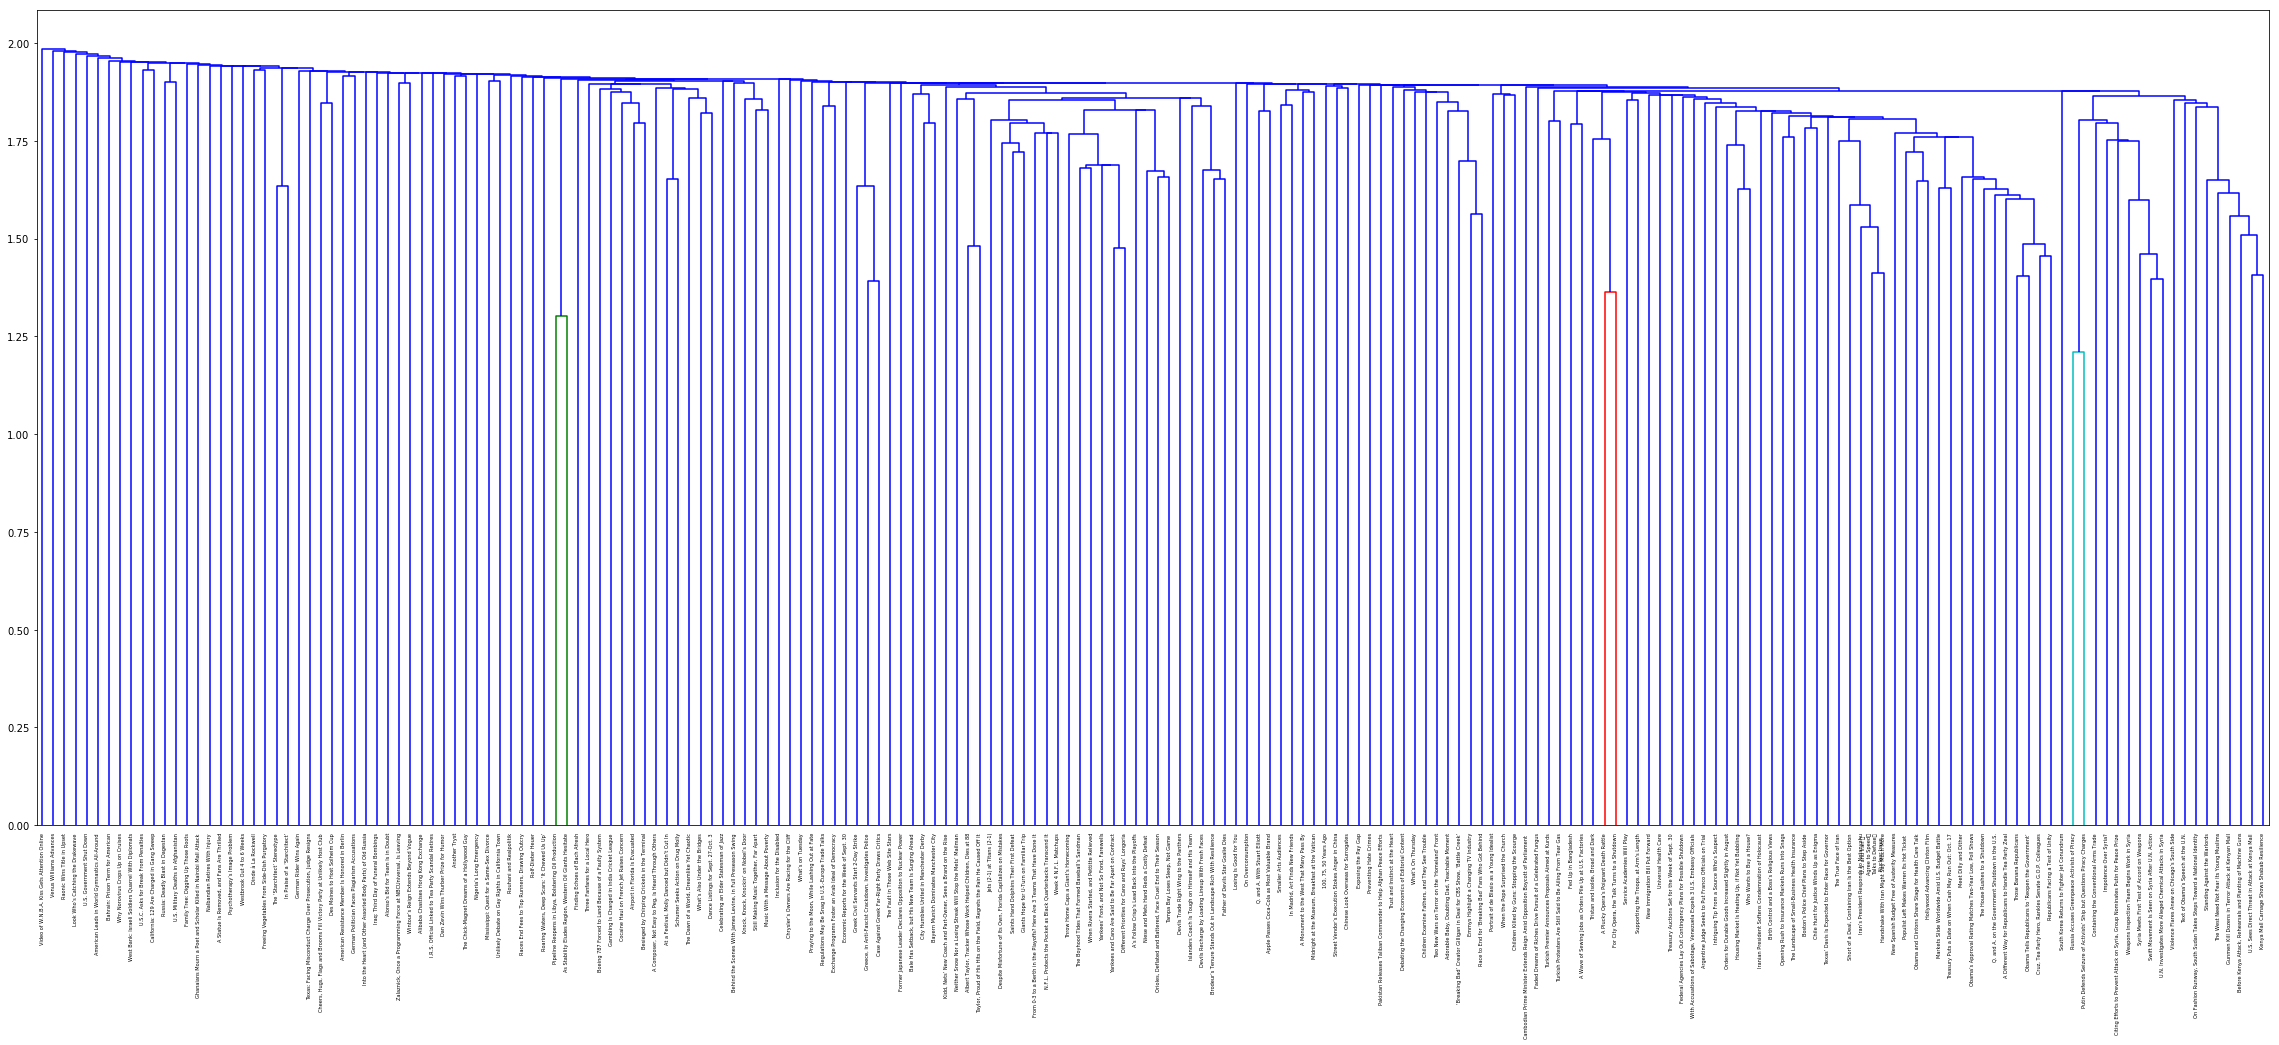

In [146]:
fig = plt.figure(figsize = (40, 15))

R = dendrogram(linkage(sq), labels = s_title)

fig.savefig('test_dendro_2.pdf', dpi = 100)